# Predicting Seasonal Vaccine Strains with `emergenet.domseq`

This example H1N1 from 2021-2022, northern hemisphere to predict the dominant H1N1 strain for the 2022-2023 season.

## Installation

In [1]:
%%capture
!pip install emergenet --upgrade

import pandas as pd
from emergenet.domseq import DomSeq
from emergenet.utils import save_model, load_model

DATA_DIR = 'data/domseq/'

## Predicting the Dominant H1N1 Strain for the 2022-2023 Season
E-Centroid: $$x_{*}^{t+\delta} = argmin_{y\in \bigcup_{r\leq t}H^{\tau}} \sum_{x \in {H^t}} \theta(x,y) - |H^t|A \text{ln}\omega_y$$
- $x_{*}^{t+\delta}$ is the dominant strain in the upcoming flu season at time $t+\omega$
- $H^t$ is the sequence population at time $t$
- $\theta(x,y)$ is the e-distance between $x$ and $y$ in their respective Enets
- $A = \frac{1-\alpha}{\sqrt{8}N^2}$, where $\alpha$ is a fixed significance level and $N$ is the sequence length considered
- $\text{ln}\omega_y$ is the membership degree of sequence $y$
- We do this computation for each cluster (clusters defined by e-distance matrix)

### Training the Model

In [2]:
# Initialize the DomSeq
domseq = DomSeq(seq_trunc_length=565, random_state=42)

# Load data from current time period (2021-2022 season)
df = pd.read_csv(DATA_DIR+'north_h1n1_21_22.csv')

print('Number of sequences:', len(df))
df.head()

Number of sequences: 735


,acc,name,date,sequence,acc_na,sequence_na
0,EPI1877640,A/Togo/0146/2021,2021-02-15,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,EPI1877636,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVSHSIQIGNQSQI...
1,EPI1877399,A/Togo/0093/2021,2021-02-15,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,EPI1877398,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVSHSIQIGNQSQI...
2,EPI1877567,A/Togo/0094/2021,2021-02-15,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,EPI1877566,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVSHSIQIGNQSQI...
3,EPI1877448,A/Togo/0079/2021,2021-02-15,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,EPI1877447,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVSHSIQIGNQSQI...
4,EPI1877427,A/Togo/0169/2021,2021-02-16,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,EPI1877426,MNPNQKIITIGSICMAIGTANLILQIGNIISIWVSHSIQIGNQSQI...


In [3]:
%%time
# Train enet
enet = domseq.train(seq_df=df, sample_size=3000, n_jobs=1)
# Save enet
save_model(enet=enet, outfile=DATA_DIR+'enet.joblib')

CPU times: user 6min 23s, sys: 4.95 s, total: 6min 28s
Wall time: 6min 29s


In [4]:
# Load enet
enet_model = load_model(filepath=DATA_DIR+'enet.joblib')

### Multi-cluster predictions

First, we use our model to compute three predictions, one from each of the top three largest clusters.

In [5]:
# Load candidate sequences for recommendation
# This includes all human H1N1 strains up until the 2021-2022 season
candidate_df = pd.read_csv(DATA_DIR+'north_h1n1_21_22_pred.csv')

print('Number of sequences:', len(candidate_df))
candidate_df.head()

Number of sequences: 18057


,acc,name,date,sequence,acc_na,sequence_na
0,AJK00834.1,A/Memphis/1/2001,2001-09-25,MKAKLLVLLCTFTATYADTICIGYHANNSTDTVDTVLEKNVTVTHS...,ABO38024.1,MNPNQKIITIGSISIAIGIISLMLQIGNIISIWASHSIQTGSQNHT...
1,AJK02489.1,A/Memphis/7/2001,2001-09-25,MKAKLLVLLCTFTATYADTICIGYHANNSTDTVDTVLEKNVTVTHS...,ABO32962.1,MNPNQKIITIGSISIAIGIISLMLQIGNIISIWASHSIQTGSKNHT...
2,AJK02965.1,A/Memphis/8/2001,2001-09-25,MKAKLLVLLCTFTATYADTICIGYHANNSTDTVDTVLEKNVTVTHS...,ABN51080.1,MNPNQKIITIGSISIAIGIISLMLQIGNIISIWASHSIQTGSQNHT...
3,AJK03129.1,A/Memphis/6/2001,2001-09-25,MRAKLLVLLCTFTATYADTICIGYHANNSTDTVDTVLEKNVTVTHS...,ABO32951.1,MNPNQKIITIGSISIAIGIISLMLQIGNIISIWASHSIQTGSQNHT...
4,AFQ90527.1,A/Chile/8885/2001,2001-09-25,MKAKLLVLLCTFTATYADTICIGYHANNSTDTVDTVLEKNVTVTHS...,AFO66161.1,MNPNQKIITIGSISIAIGIISLMLQIGNIISIWASHSIQTGSQNHT...


symmetric case
CPU times: user 2h 48min 2s, sys: 3min 38s, total: 2h 51min 40s
Wall time: 1h 19min 2s


,acc,name,date,sequence,acc_na,sequence_na,first_term,second_term,sum,cluster_count,cluster_area
17401,EPI1794713,A/Portugal/SU306/2020,2020-02-27,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,EPI1794714,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVSHSIQTGNQSQI...,0.234122,-0.001800,0.235922,528,116.320435
17834,EPI1925191,A/Bangladesh/9004/2021,2021-09-08,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,EPI1925190,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,0.088810,-0.004613,0.093424,193,39.533846
17824,EPI1918841,A/North_Dakota/12226/2021,2021-09-01,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,EPI1918840,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVSHSIQIGNQNQI...,0.009333,-0.000253,0.009587,3,2.774466


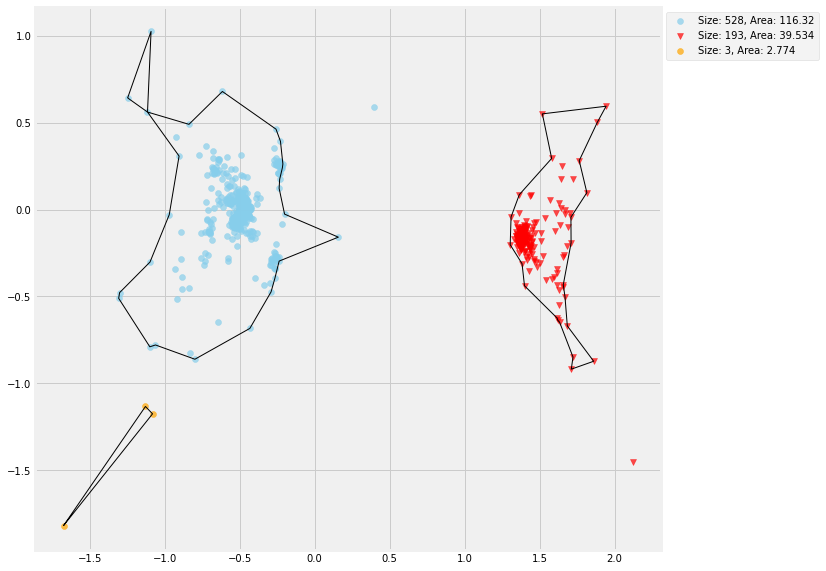

In [6]:
%%time
# Compute prediction sequences (return predictions from top 3 largest clusters)
pred_df = domseq.predict_domseq(seq_df=df, 
                                pred_seq_df=candidate_df, 
                                enet=enet_model, 
                                n_clusters=3, 
                                sample_size=3000)
pred_df = pred_df.sort_values(by=['cluster_count'], ascending=False)
pred_df.to_csv(DATA_DIR+'predictions_for_22_23.csv', index=False)
pred_df

### Single-cluster Predictions

We use our multi-cluster predictions to estimate a single best dominant strain for the 2022-2023 season.

The `predict_single_domseq` function requires two inputs:

1. `pred_seqs` - Emergenet recommended sequences, with additional column `cluster_count`. This should have at least two rows (i.e. predictions from two clusters)
2. `pred_seq_df` - DataFrame of candidate sequences

In [7]:
# Again, load candidate sequences for recommendation
candidate_df = pd.read_csv(DATA_DIR+'north_h1n1_21_22_pred.csv')

# Load the 3-cluster predictions from the previous cell
pred_df = pd.read_csv(DATA_DIR+'predictions_for_22_23.csv')

# Compute a single prediction for the dominant strain
single_pred_seq = domseq.predict_single_domseq(pred_seqs=pred_df, 
                                               pred_seq_df=candidate_df)
single_pred_seq.to_csv(DATA_DIR+'single_prediction_for_22_23.csv', index=False)
single_pred_seq

,acc,name,date,sequence,acc_na,sequence_na,ratio
16435,EPI1684151,A/Kansas/02/2020,2020-01-07,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,EPI1684150,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVSHSIQTENQSQI...,0.198864
